<a href="https://colab.research.google.com/github/Arjun-krish-10/Football-Analytics-Visualization-/blob/main/Streamlit_football.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install streamlit

In [ ]:
!pip install pyngrok==4.1.1

  Created wheel for pyngrok: filename=pyngrok-4.1.1-cp37-none-any.whl size=15971 sha256=8040b9bc60ca50bce2728d5d83fbae4809e7b1c0537d1e242ac55c5e2434fb30
  Stored in directory: /root/.cache/pip/wheels/97/71/0d/1695f7c8815c0beb3b5d9b35d6eec9243c87e6070fbe3977fa
Successfully built pyngrok


In [ ]:
pip install statsbombpy

     |████████████████████████████████| 143kB 6.8MB/s 
     |████████████████████████████████| 245kB 10.5MB/s 
  Created wheel for cashier: filename=cashier-1.3-py2.py3-none-any.whl size=3233 sha256=4ba275f0d8d0a11682add3238f79a42f59d888322209a885c9e084130d56094f
  Stored in directory: /root/.cache/pip/wheels/3e/69/ef/8607bf56b62fe4eed1a4811dbd6a9fd15dec82bcb42d737056
Successfully built cashier
ERROR: datascience 0.10.6 has requirement coverage==3.7.1, but you'll have coverage 5.5 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: coveralls 0.5 has requirement coverage<3.999,>=3.6, but you'll have coverage 5.5 which is incompatible.
  Found existing installation: coverage 3.7.1
    Uninstalling coverage-3.7.1:
      Successfully uninstalled coverage-3.7.1


In [ ]:
!pip3 install mplsoccer

     |████████████████████████████████| 61kB 4.7MB/s 
  Created wheel for mplsoccer: filename=mplsoccer-1.0.2-cp37-none-any.whl size=61856 sha256=e6807c34b9f66af5fd10f984948fb028e66c403ed748c0a1f30eda54dc274004
  Stored in directory: /root/.cache/pip/wheels/30/88/9c/ca6e1c591ab0177712820c78af0df3269e633be7e4c23e3140
Successfully built mplsoccer


In [ ]:
from statsbombpy import sb
import mplsoccer as mp

In [ ]:
   sb.matches(competition_id=43,season_id=3)['competition_stage'].unique()

credentials were not supplied. open data access only


array(['Round of 16', 'Group Stage', 'Quarter-finals', 'Final',
       'Semi-finals', '3rd Place Final'], dtype=object)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9b1aa76ed0>)

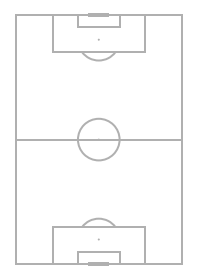

In [ ]:
pitch = mp.VerticalPitch()
pitch.draw()

In [ ]:
# def get_competitions():
#     competitions = sb.competitions()
#     comps = competitions['competition_name'].unique()
#     gender = competitions['competition_gender'].unique()
#     season = competitions['season_name'].unique()

#     return comps,gender,seasons

In [ ]:
%%writefile app.py

import streamlit as st
import pandas as pd
from statsbombpy import sb
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch,VerticalPitch
import seaborn as sns


st.set_option('deprecation.showPyplotGlobalUse', False)

# @st.cache(allow_output_mutation = True)
# def load_data():
#     df_CL_17_18 = df_comp = sb.competitions()

#     return comps,gender,seasons
def get_match_id():

    df_comp = sb.competitions()
    # comps = get_competitions()
    st.sidebar.title('Football analysis Selection')
    gender = st.sidebar.selectbox("Select gender",df_comp['competition_gender'].unique())
    df_gender = df_comp[df_comp['competition_gender'] == gender]
    if len(df_gender) > 0:
        # st.dataframe(df_gender)
        league = st.sidebar.selectbox("Select Competition",df_gender['competition_name'].unique())
        df_league = df_gender[df_gender['competition_name'] == league]
        if len(df_league) > 0:
            # st.dataframe(df_league)
            season = st.sidebar.selectbox("Select Season",df_league['season_name'].unique())
            df_season = df_league[df_league['season_name'] == season]
            if len(df_season) > 0:
                # st.dataframe(df_season)
                # comp_gender = st.sidebar.selectbox("Competition",comps[comps['competition_gender'] == gender])
                # specific_comp = comps[comps['competition_name' == comp]]
                # season = st.sidebar.selectbox("Season",specific_comp['season_name'].unique())
                comp_id = df_season.iloc[0]['competition_id']
                season_id = df_season.iloc[0]['season_id']

                df_matches = sb.matches(competition_id = comp_id ,season_id =season_id )
                if len(df_matches) > 0:
                    # st.dataframe(df_matches)

                    round = st.sidebar.selectbox('Choose the round you want to view',df_matches['competition_stage'].unique())
                    df_round = df_matches[df_matches['competition_stage'] == round]
                    if len(df_round) > 0:
                        # st.dataframe(df_round[['match_id','home_team','away_team','competition_stage']])
                        match = st.sidebar.selectbox('Select the match you want to analyze',[df_round.iloc[i]['home_team'] + '-' + df_round.iloc[i]['away_team'] for i in range(len(df_round))])
                        teams = match.split('-')
                        # st.write(teams)
                        chosen_match = df_round[(df_round['home_team'] == teams[0]) & (df_round['away_team'] == teams[1])]
                        st.dataframe(chosen_match)
                        match_id = chosen_match.iloc[0]['match_id']
                        
                        return match_id

def main():
   
    st.title("Football viz")
    st.header('Football analysis')
    match_id = get_match_id()
    st.write(match_id)
    df_events = events = sb.events(match_id=match_id)
    
    # st.dataframe(df_events.head())
    team = st.selectbox('Select the team you want to analyze',df_events['team'].unique())
    task = st.selectbox('Select viz',['Pass','Shots','Player heat map'])
    if task == 'Pass':
        df_pass = df_events[(df_events['team'] == team) & (df_events['type'] == 'Pass')].sort_values('minute').reset_index()
        df_pass['pass_outcome'] = df_pass['pass_outcome'].fillna('Success')
        df_pass[['x','y']] = df_pass['location'].apply(pd.Series)
        df_pass[['end_x','end_y']] = df_pass['pass_end_location'].apply(pd.Series)

        player = st.selectbox('Enter the player name',df_pass['player'].unique())

        fig, ax = plt.subplots(figsize=(13.5,8))
        fig.set_facecolor('#22312b')
        ax.patch.set_facecolor('#22312b')
        pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
                    pitch_color='#22312b', line_color='#c7d5cc', figsize=(16, 11),
                    constrained_layout=True, tight_layout=True)
        pitch.draw(ax =ax)
        # plt.gca().invert_yaxis()
        # st.pyplot(fig)


        player_pass = df_pass[(df_pass['player'] == player) & (df_pass['minute'] < 91)].reset_index(drop=True)

        for i in range(len(player_pass)):
            if player_pass['pass_outcome'][i] == 'Success':
                ax.plot((player_pass['x'][i],player_pass['end_x'][i]),(player_pass['y'][i],player_pass['end_y'][i]),color = 'green')
                ax.scatter(player_pass['x'][i],player_pass['y'][i],color ='green')
            if (player_pass['pass_outcome'][i] == 'Success') & (player_pass['pass_height'][i] == 'High Pass'):
                ax.plot((player_pass['x'][i],player_pass['end_x'][i]),(player_pass['y'][i],player_pass['end_y'][i]),ls = '--',color = 'green')
                ax.scatter(player_pass['x'][i],player_pass['y'][i],color ='green')
            if player_pass['pass_outcome'][i] == 'Incomplete':
                ax.plot((player_pass['x'][i],player_pass['end_x'][i]),(player_pass['y'][i],player_pass['end_y'][i]),color = 'red')
                ax.scatter(player_pass['x'][i],player_pass['y'][i],color ='red')
        st.pyplot(fig)

    if task == 'Shots':
        pass
    if task == 'Player heat map':
        df_team_events = df_events[(df_events['team'] == team)].sort_values('minute').reset_index(drop=True).dropna(subset=['player'])
        player = st.selectbox('Select player you want',df_team_events['player'].unique())
        df_pos = df_team_events[['player','location','minute','timestamp','team']].dropna(subset=['player','location']).reset_index(drop=True).sort_values('minute')
        # st.dataframe(df_pos[df_pos['player'] == player])
        # st.write(player)
        df_player_pos = df_pos[df_pos['player'] == player]
        df_player_pos[['x','y']] = df_player_pos['location'].apply(pd.Series)
        pitch = VerticalPitch(pitch_color='#22312b', line_color='#c7d5cc', figsize=(7, 4),tight_layout =True)
        fig,ax = pitch.draw()
        fig.set_facecolor('#22312b')
        sns.kdeplot(df_player_pos['x'],df_player_pos['y'],cmap='coolwarm',shade=True,shade_lowest=False,alpha = 0.7,thresh=0.4,levels=100,vertical=True,linewidth=0)
        plt.xlim(0,80)
        plt.ylim(0,120)
        # fig.size = (8,5)
        st.pyplot(fig)

if __name__ == '__main__':
    main()

Overwriting app.py


In [ ]:
!ngrok authtoken 1rmvOrqc2OvfRyCBtYSBaPw7roC_35VqwkJoQoowoWpmbWH31
!nohup streamlit run app.py &
from pyngrok import ngrok
url = ngrok.connect(port=8501)

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml
nohup: appending output to 'nohup.out'


In [ ]:
url

'http://52491f129ec7.ngrok.io'